### ----------------------------------------------------------------------------------------------------------------------
### Darie-Dragos Mitoiu - 1905367
### CM4107 Advanced Artificial Intelligence
### Artificial Neural Network v1.0.0 26/10/2020
### A jupyter notebook for an artificial neural network
### ----------------------------------------------------------------------------------------------------------------------

### Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import seaborn as sns

### Setting Preferences

In [3]:
# Setting matplotlib inline
%matplotlib inline

In [4]:
# Setting seaborn style
sns.set_style("darkgrid")

In [5]:
# Setting numpy seed
np.random.seed(42)

### Set Global Variables

In [6]:
# Set the training file name
train_file = "data/mnist_train.csv"
# The testing file name
test_file = "data/mnist_test.csv"

# Set the number of input nodes
input_nodes = 784
# Set the number of hidden nodes
hidden_nodes = 200
# Set the number of output nodes
output_nodes = 10

# Set the epochs number
epochs = 10
# Set the batch size number
batch_size = 1
# Set the learning rate number
learning_rate = 0.3

### Load MNIST Training and Testing Datasets

In [7]:
# Read the training dataset
df_orig_train = pd.read_csv(train_file, header=None)
# Read the testing dataset
df_orig_test = pd.read_csv(test_file, header=None)

### MNIST Training Data Insight

In [8]:
print("The number of records in the mnist training dataset is: ",df_orig_train.shape[0])
print("The number of columns in the mnist training dataset is: ", df_orig_train.shape[1])

The number of records in the mnist training dataset is:  60000
The number of columns in the mnist training dataset is:  785


In [9]:
# Show training dataset relevant information
df_orig_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
# Show the head of the training dataset
df_orig_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MNIST Testing Data Insight 

In [11]:
print("The number of records in the mnist testing dataset is: ",df_orig_test.shape[0])
print("The number of columns in the mnist testing dataset is: ", df_orig_test.shape[1])

The number of records in the mnist testing dataset is:  10000
The number of columns in the mnist testing dataset is:  785


In [12]:
# Show testing dataset relevant information
df_orig_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
# Show the head of the testing dataset
df_orig_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MNIST Training Data Frame Dimensionality

In [14]:
y_train_all =  pd.get_dummies(df_orig_train[0]).values
X_train_all = df_orig_train.drop(0, axis = 1).values
print(y_train_all.shape)
print(X_train_all.shape)

(60000, 10)
(60000, 784)


### MNIST Testing Data Frame Dimensionality

In [16]:
y_test_all =  pd.get_dummies(df_orig_test[0]).values
X_test_all = df_orig_test.drop(0, axis = 1).values
print(y_test_all.shape)
print(X_test_all.shape)

(10000, 10)
(10000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Data Pre-Processing

In [26]:
# Select smaller samples of the train and test datasets
train_sample_size = 1500  # choosing a smaller sample instead of the entire dataset
random_indices = np.random.choice(range(len(y_train_all)), train_sample_size, replace = False)

X_train = X_train_all[random_indices]
y_train = y_train_all[random_indices]
print(y_train.shape)
print(X_train.shape)

#preprocessing steps
X_train = (X_train / 255.0 * 0.99) + 0.01
y_train = y_train + 0.01
y_train = np.where(y_train != 1.01, y_train, 0.99)
print(y_train.shape)

test_sample_size = 100 
random_test_indices = np.random.choice(range(len(y_test_all)), test_sample_size, replace = False)
X_test = X_test_all[random_test_indices]
y_test = y_test_all[random_test_indices]
print(y_test.shape)
print(X_test.shape)

X_test = (X_test / 255.0 * 0.99) + 0.01
y_test = y_test + 0.01
y_test = np.where(y_test != 1.01, y_test, 0.99)

(1500, 10)
(1500, 784)
(1500, 10)
(100, 10)
(100, 784)


### Utility Functions

In [27]:
def mean_squared_error(predictions, targets):
    """
    Calculates mean squared error of a model's predictions.
    """
    N=targets.size
    mse = ((targets - predictions) **2).sum() / (2*N)
    return mse


def accuracy(predictions, targets):
    """
    Calculates the accuracy of a model's predictions.
    """
    prediction_labels = np.argmax(predictions, axis=1)
    target_labels = np.argmax(targets, axis=1)
    predictions_correct = (prediction_labels == target_labels.round())
    accuracy = predictions_correct.mean()
    return accuracy

### Activation Classes

In [28]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def backward(self, inputs):
        self.output = np.greater(inputs, 0).astype(int) # inputs > 0 then convert bools to int
        
class Activation_Sigmoid:
    def forward(self, x):
        return(1 / (1 + np.exp(-x)))
    def backward(self, x):
        return(x * ( 1 - x))

### Layer Class

In [29]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, learningrate=0.01, activation='sigmoid'):
        
        self.weights = np.random.normal(0.0, pow(n_inputs, -0.5), (n_inputs, n_neurons))
        print(self.weights.shape)
        self.biases = np.zeros((1, n_neurons))
       
        self.lr = learningrate
        self.activate=activation  
        
    def forward(self, inputs):
        self.in_values = inputs
        self.layer_input = np.dot(inputs , self.weights) + self.biases
        self.activation()
    
    def activation(self):
        if self.activate == 'sigmoid':
            a = Activation_Sigmoid()
            self.layer_output = a.forward(self.layer_input)
            
           
    def del_activation(self):
        if self.activate == 'sigmoid':
            del_a = Activation_Sigmoid()
            self.del_layer_output =  del_a.backward(del_a.forward(self.layer_input))
      
    def backward(self, delta_in, weights_in, targets=None, output_layer=False):
        self.del_activation()
        if output_layer:
            self.layer_error = self.layer_output - targets
            self.layer_delta = self.layer_error * self.del_layer_output
        else:          
            self.layer_error = np.dot(delta_in, weights_in.T)
            self.layer_delta = self.layer_error * self.del_layer_output
        
    def weight_update(self, prev_layer_output):
        # print("prev_layer_output.T.shape: "+str(prev_layer_output.T.shape))
        # print("self.layer_delta.shape: "+str(self.layer_delta.shape))
        N = self.layer_delta.shape[0]
        weights_update = np.dot(prev_layer_output.T, self.layer_delta) / N
        # print(weights_update.shape)
        self.weights -= self.lr * weights_update
        biases_update = np.mean(self.layer_delta, axis=0, keepdims=True)
        # print("biases_update.shape: "+ str(biases_update.shape))
        # print("self.biases.shape: "+ str(self.biases.shape))
        self.biases -= self.lr * biases_update

### Creating Layers

In [30]:
layer1 = Layer_Dense(784, 200) # set the weight matrix dimensions (input nodes x hidden nodes)
output = Layer_Dense(200, 10) # set the weight matrix dimensions (hidden nodes x output nodes)

# maintain a dataframe to keep track of the network error
monitoring = {}
monitoring['mean_squared_error'] = []
monitoring['accuracy'] = []

# iterate and update weights at each epoch
for epoch in range(100):
    layer1.forward(X_train)
    # print('layer1 output \n' ,layer1.layer_output.shape)
    output.forward(layer1.layer_output)
    # print('layer output  \n', output.layer_output.shape)

    # train metrics
    pred = output.layer_output
    mse = mean_squared_error(pred, y_train)
    acc = accuracy(output.layer_output, y_train)
    monitoring['mean_squared_error'].append(mse)
    monitoring['accuracy'].append(acc)

    # backprop through the layers 
    output.backward(None, None, y_train, True)
    # print('layer out delta  \n', output.layer_delta.shape)
    layer1.backward(output.layer_delta, output.weights)
    # print('layer1 delta  \n', layer1.layer_delta.shape)

    # update all the layer weights
    output.weight_update(layer1.layer_output)
    # print('layer weights  \n', output.weights.shape)
    layer1.weight_update(X_train)
    # print('layer weights  \n', layer1.weights.shape)

monitoring_df = pd.DataFrame(monitoring)   
monitoring_df

(784, 200)
(200, 10)


,mean_squared_error,accuracy
0,0.115913,0.104000
1,0.111464,0.104000
2,0.107237,0.104000
3,0.103236,0.104000
4,0.099461,0.104000
...,...,...
95,0.044720,0.164667
96,0.044681,0.164667
97,0.044642,0.164000
98,0.044605,0.165333


### Creating Artificial Neural Network

In [31]:
class ANN():
    def __init__(self, ouput_layer, hidden_layer, batch_size = 10):
        self.output = ouput_layer
        self.layer1 = hidden_layer
        self.batch_size = batch_size

    def batch_input(self, x, y):
        for i in range(0, len(x), self.batch_size):
            yield (x[i:i + self.batch_size], y[i:i + self.batch_size])

    def train(self, x, y, epochs, lr):
        self.layer1.lr = lr
        self.output.lr = lr

        monitoring = {}
        monitoring['mean_squared_error'] = []
        monitoring['accuracy'] = []

        for epoch in range(epochs):

            for (batch_x, batch_y) in self.batch_input(x, y):
                self.layer1.forward(batch_x)
                # print('layer1 output \n' ,layer1.layer_output.shape)
                self.output.forward(self.layer1.layer_output)
                # print('layer output  \n', output.layer_output.shape)

                # backprop through the layers 
                self.output.backward(None, None, batch_y, True)
                # print('layer out delta  \n', output.layer_delta.shape)
                self.layer1.backward(self.output.layer_delta, self.output.weights)
                # print('layer1 delta  \n', layer1.layer_delta.shape)

                # update all the layer weights
                self.output.weight_update(self.layer1.layer_output)
                # print('layer weights  \n', output.weights.shape)
                self.layer1.weight_update(batch_x)
                # print('layer weights  \n', layer1.weights.shape)
            pred = self.predict(x)
            mse, acc = self.evaluate(pred, y)
            monitoring['mean_squared_error'].append(mse)
            monitoring['accuracy'].append(acc)

        monitoring_df = pd.DataFrame(monitoring)   
        return monitoring_df

    def predict(self, x):
        self.layer1.forward(x)
        self.output.forward(self.layer1.layer_output)
        return self.output.layer_output

    def evaluate(self, predicts, y):
        mse = mean_squared_error(predicts, y)
        acc = accuracy(predicts, y)
        return mse, acc

    def test(self, x, y):
        monitoring = {}
        pred = self.predict(x)
        mse, acc = self.evaluate(pred, y)
        monitoring['mean_squared_error'] = [mse]
        monitoring['accuracy'] = [acc]
        return pd.DataFrame(monitoring)

### Evaluation of Hyper-Parameters

### Default Hyper-Parameters

In [32]:
np.random.seed(42)

# Configurations of hidden node layer
hidden_nodes = [200, 5]

# Default hyper-parameters
batch_size = 20
epochs = 10
lr = 0.3

### Epochs Testing Values

In [33]:
# Declaring epochs array
epochs_values = [10, 50, 100, 150, 200]

#### Creating Artificial Neural Network Models

In [34]:
epochs_ann_list = []
epochs_train_results_list = []
print("Creating ANN models using the epochs array: ", epochs_values)
for epoch in epochs_values:
    # configure the layers
    epochs_hidden_layer = Layer_Dense(784,200)
    epochs_output_layer = Layer_Dense(200,10)

    # create an ANN model
    epochs_ann = ANN(epochs_output_layer, epochs_hidden_layer, batch_size=20)
    epochs_train_performance = epochs_ann.train(X_train, y_train, epoch, lr=0.3) # train the model

    epochs_train_results_list.append(epochs_train_performance)
    epochs_ann_list.append(epochs_ann) # maintain each ANN model in a list

print("Process Completed.")

Creating ANN models using the epochs array:  [10, 50, 100, 150, 200]
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
Process Completed.


#### Evaluating the Accuracy and Error rate of the ANN Models based on the number of Epochs

In [35]:
epochs_test_results_list = []
for model in epochs_ann_list:
    epochs_df_test_result = model.test(X_test, y_test)
    mse=epochs_df_test_result['mean_squared_error'].values
    acc=epochs_df_test_result['accuracy'].values
    epochs_test_results_list.append((mse[0], acc[0]))
    pass
pass

print ("Mean Squared Error and Accuracy Results \n {}".format(epochs_test_results_list))

Mean Squared Error and Accuracy Results 
 [(0.016867020772722584, 0.86), (0.009402140603180962, 0.89), (0.0080336499184702, 0.91), (0.007447751084037053, 0.92), (0.007043641149263216, 0.93)]


In [36]:
df_epochs_results = pd.DataFrame(epochs_test_results_list, columns=['mean_squared_error', 'accuracy'], index=epochs_values)
df_epochs_results.head()

,mean_squared_error,accuracy
10,0.016867,0.86
50,0.009402,0.89
100,0.008034,0.91
150,0.007448,0.92
200,0.007044,0.93


#### Visualising the results for the array of epochs

Text(0, 0.5, 'Accuracy')

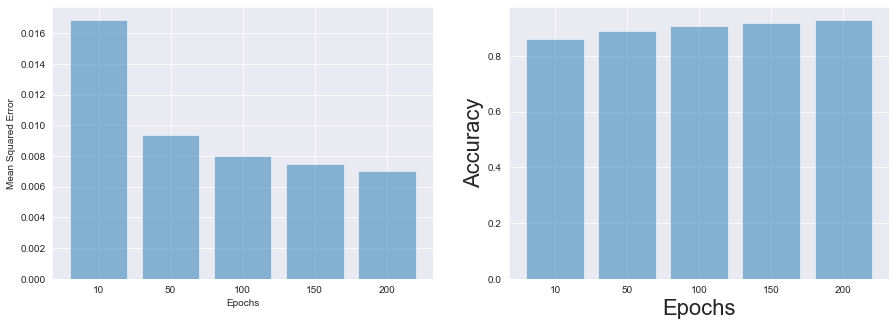

In [37]:
epochs_objects = epochs_values
epochs_performance = epochs_test_results_list

# plot performances bars
epochs_fig, epochs_axes = plt.subplots(1, 2, figsize=(15,5))
y_pos = np.arange(len(epochs_objects))
# get mean squared error from performance
epochs_model_mse = [x[0] for x in epochs_performance]
epochs_axes[0].bar(y_pos, epochs_model_mse, align='center', alpha=0.5)
epochs_axes[0].set_xticks(y_pos)
epochs_axes[0].set_xticklabels(epochs_objects)
epochs_axes[0].set_xlabel("Epochs")
epochs_axes[0].set_ylabel("Mean Squared Error")

# plot accuracy from performance
epochs_model_acc = [x[1] for x in epochs_performance]
epochs_axes[1].bar(y_pos, epochs_model_acc, align='center', alpha=0.5)
epochs_axes[1].set_xticks(y_pos)
epochs_axes[1].set_xticklabels(epochs_objects)
epochs_axes[1].set_xlabel("Epochs", fontsize=22)
epochs_axes[1].set_ylabel("Accuracy", fontsize=22)

In [38]:
# Try different configurations of hidden layer and batch size
print("Percentage of training data used: ", (len(y_train)/len(y_train_all)) * 100)

print("This will take a few moments ...")
train_results_list = []
ann_list = []

# lets create the set of modesl
for hidden in hidden_nodes:
    ann_list_element = [] # first set of nets with a given hidden node size
    for epoch in epochs_values:
        # configure the layers
        hidden_layer = Layer_Dense(784, hidden)
        output_layer = Layer_Dense(hidden, 10)
        ann_ = ANN(output_layer, hidden_layer, batch_size=20) # create a new ANN model with a specific batch size
        train_performance = ann_.train(X_train, y_train, epoch, lr=0.3) # train the model

        train_results_list.append(train_performance)
        ann_list_element.append(ann_) # maintain each ANN model in a list
 
        pass
    
    ann_list.append(ann_list_element)# now append the set of models 
    pass

#lets test the models 
model_results = []
model_result_element = []

for model1 in ann_list:
    model_result_element = []
    
    for model2 in model1:
        df_test_result = model2.test(X_test, y_test)
        mse=df_test_result['mean_squared_error'].values
        acc=df_test_result['accuracy'].values

        model_result_element.append((mse[0], acc[0]))
        pass
    model_results.append(model_result_element)
    pass

print('completed')

Percentage of training data used:  2.5
This will take a few moments ...
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
completed


Text(0.5, 1.0, 'Mean Squared Average')

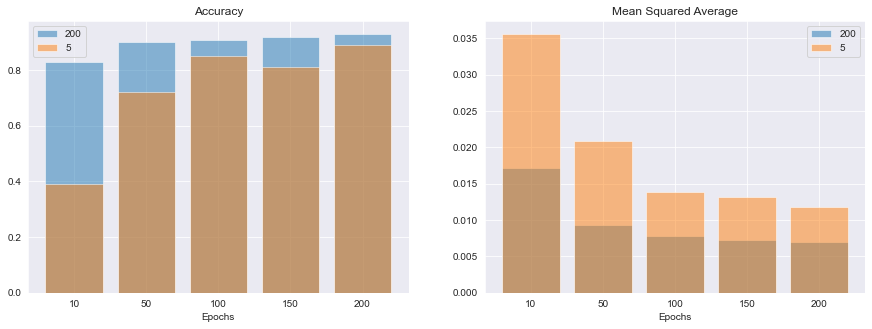

In [39]:
epochs_objects = epochs_values

epochs_fig, epochs_axes = plt.subplots(1, 2, figsize=(15,5))

y_pos = np.arange(len(epochs_objects))
for result in model_results:
    performance_mse = [x[0] for x in result]  # mean squared error
    performance_acc = [x[1] for x in result]  # accuracy
    epochs_axes[0].bar(y_pos, performance_acc, align='center', alpha=0.5 )  # add accuracy to plot
    epochs_axes[1].bar(y_pos, performance_mse, align='center', alpha=0.5 )  #  add mean squared error to plot

epochs_axes[0].legend(hidden_nodes)
epochs_axes[0].set_xticks(y_pos)
epochs_axes[0].set_xticklabels(epochs_objects)
epochs_axes[0].set_xlabel("Epochs")
epochs_axes[0].set_title("Accuracy")

epochs_axes[1].legend(hidden_nodes)
epochs_axes[1].set_xticks(y_pos)
epochs_axes[1].set_xticklabels(epochs_objects)
epochs_axes[1].set_xlabel("Epochs")
epochs_axes[1].set_title("Mean Squared Average")

### Learning Rate Testing Values

In [40]:
# Declaring learning rate array
learning_rate_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#### Creating Artificial Neural Network Models

In [41]:
learning_rate_ann_list = []
learning_rate_train_results_list = []

for rate in learning_rate_values:
    # configure the layers
    learning_rate_hidden_layer = Layer_Dense(784,200)
    learning_rate_output_layer = Layer_Dense(200,10)

    # create an ANN model
    learning_rate_ann = ANN(learning_rate_output_layer, learning_rate_hidden_layer, batch_size=20)
    learning_rate_train_performance = learning_rate_ann.train(X_train, y_train, epochs=20, lr=rate)

    learning_rate_train_results_list.append(learning_rate_train_performance)
    learning_rate_ann_list.append(learning_rate_ann) # maintain each ANN model in a list

print('completed')

(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
completed


#### Evaluating the Accuracy and Error rate of the ANN Models based on Learning Rate Values

In [43]:
learning_rate_test_results_list = []

for model in learning_rate_ann_list: 
    learning_rate_df_test_result = model.test(X_test, y_test)
    learning_rate_mse=learning_rate_df_test_result['mean_squared_error'].values
    learning_rate_acc=learning_rate_df_test_result['accuracy'].values

    learning_rate_test_results_list.append((learning_rate_mse[0], learning_rate_acc[0]))

    pass
pass

print ("Mean Squared Error and Accuracy Results \n {}".format(learning_rate_test_results_list))

Mean Squared Error and Accuracy Results 
 [(0.020968628494255775, 0.84), (0.014347546201290438, 0.87), (0.011948989142301369, 0.87), (0.011112556955712529, 0.87), (0.01046421521337232, 0.87), (0.010164130947108305, 0.9), (0.00961479582204414, 0.9), (0.009386298585830129, 0.89), (0.009051498624260242, 0.89), (0.008924627788035816, 0.89)]


In [44]:
df_learning_results = pd.DataFrame(learning_rate_test_results_list,
                                   columns=['mean_squared_error', 'accuracy'],
                                   index=learning_rate_values)
df_learning_results.head(10)

,mean_squared_error,accuracy
0.1,0.020969,0.84
0.2,0.014348,0.87
0.3,0.011949,0.87
0.4,0.011113,0.87
0.5,0.010464,0.87
0.6,0.010164,0.90
0.7,0.009615,0.90
0.8,0.009386,0.89
0.9,0.009051,0.89
1.0,0.008925,0.89


Text(0, 0.5, 'Accuracy')

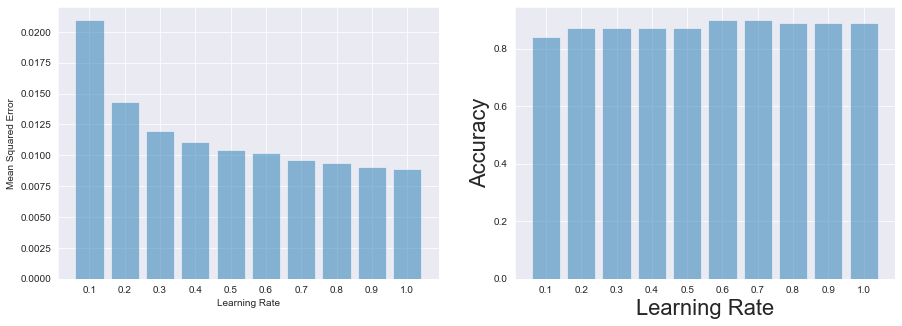

In [45]:
rate_objects = learning_rate_values
rate_performance = learning_rate_test_results_list

# plot performances bars
rate_fig, rate_axes = plt.subplots(1, 2, figsize=(15,5))
y_pos = np.arange(len(rate_objects))
# get mean squared error from performance
rate_model_mse = [x[0] for x in rate_performance]
rate_axes[0].bar(y_pos, rate_model_mse, align='center', alpha=0.5)
rate_axes[0].set_xticks(y_pos)
rate_axes[0].set_xticklabels(rate_objects)
rate_axes[0].set_xlabel("Learning Rate")
rate_axes[0].set_ylabel("Mean Squared Error")

# plot accuracy from performance
rate_model_acc = [x[1] for x in rate_performance]
rate_axes[1].bar(y_pos, rate_model_acc, align='center', alpha=0.5)
rate_axes[1].set_xticks(y_pos)
rate_axes[1].set_xticklabels(rate_objects)
rate_axes[1].set_xlabel("Learning Rate", fontsize=22)
rate_axes[1].set_ylabel("Accuracy", fontsize=22)

In [46]:
batch_values = [10, 50, 100, 200, 500, len(y_train)]  # lets try six different configurations of batch sizes

In [47]:
batch_ann_list = []
batch_results_list = []

for batch_size in batch_values:
    # configure the layers
    batch_hidden_layer = Layer_Dense(784,200)
    batch_output_layer = Layer_Dense(200,10)

    # create an ANN model
    batch_ann = ANN(batch_output_layer, batch_hidden_layer, batch_size)
    batch_train_performance = batch_ann.train(X_train, y_train, epochs=20, lr=0.3)

    batch_results_list.append(batch_train_performance)
    batch_ann_list.append(batch_ann) # maintain each ANN model in a list

print('completed')

(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
completed


In [48]:
batch_test_results_list = []

for model in batch_ann_list: 
    batch_df_test_result = model.test(X_test, y_test)
    batch_mse=batch_df_test_result['mean_squared_error'].values
    batch_acc=batch_df_test_result['accuracy'].values

    batch_test_results_list.append((batch_mse[0], batch_acc[0]))

    pass
pass

print ("Mean Squared Error and Accuracy Results \n {}".format(batch_test_results_list))

Mean Squared Error and Accuracy Results 
 [(0.010043174570122796, 0.89), (0.018696244640161536, 0.85), (0.028285139159385263, 0.69), (0.037304616591361764, 0.51), (0.041573084940705045, 0.44), (0.04261470009460825, 0.33)]


In [50]:
df_batch_results = pd.DataFrame(batch_test_results_list, columns=['mean_squared_error', 'accuracy'], index=batch_values)
df_batch_results.head()

,mean_squared_error,accuracy
10,0.010043,0.89
50,0.018696,0.85
100,0.028285,0.69
200,0.037305,0.51
500,0.041573,0.44


Text(0, 0.5, 'Accuracy')

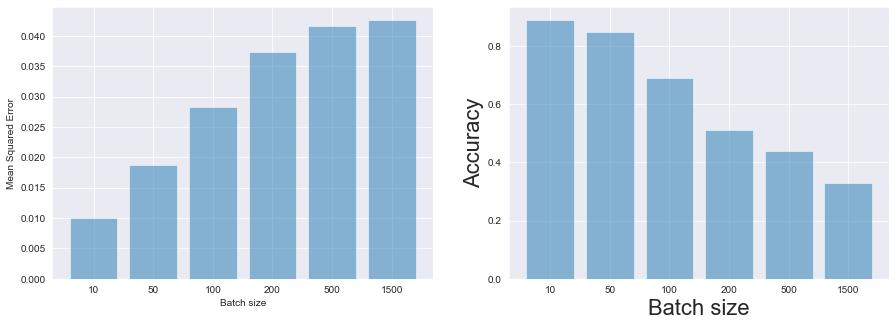

In [54]:
batch_objects = batch_values
batch_performance = batch_test_results_list

# plot performances bars
batch_fig, batch_axes = plt.subplots(1, 2, figsize=(15,5))
y_pos = np.arange(len(batch_objects))
# get mean squared error from performance
batch_model_mse = [x[0] for x in batch_performance]
batch_axes[0].bar(y_pos, batch_model_mse, align='center', alpha=0.5)
batch_axes[0].set_xticks(y_pos)
batch_axes[0].set_xticklabels(batch_objects)
batch_axes[0].set_xlabel('Batch size')
batch_axes[0].set_ylabel('Mean Squared Error')

# plot accuracy from performance
batch_model_acc = [x[1] for x in batch_performance]
batch_axes[1].bar(y_pos, batch_model_acc, align='center', alpha=0.5)
batch_axes[1].set_xticks(y_pos)
batch_axes[1].set_xticklabels(batch_objects)
batch_axes[1].set_xlabel('Batch size', fontsize=22)
batch_axes[1].set_ylabel('Accuracy', fontsize=22)

In [56]:
# Try different configurations of hidden layer and batch size
print("Percentage of training data used: ", (len(y_train)/len(y_train_all)) * 100)

print("This will take a few moments ...")
train_results_list = []
ann_list = []
hidden_nodes = [200, 5]  # two different configurations of hidden node layer

# lets create the set of modesl
for hidden in hidden_nodes:
    ann_list_element = [] # first set of nets with a given hidden node size
    for batch in batch_values:
        # configure the layers
        hidden_layer = Layer_Dense(784, hidden)
        output_layer = Layer_Dense(hidden, 10)
        ann_ = ANN(output_layer, hidden_layer, batch) # create a new ANN model with a specific batch size
        train_performance = ann_.train(X_train, y_train, epochs=20, lr=0.3) # train the model

        train_results_list.append(train_performance)
        ann_list_element.append(ann_) # maintain each ANN model in a list
 
        pass
    
    ann_list.append(ann_list_element)# now append the set of models 
    pass

#lets test the models 
model_results = []
model_result_element = []

for model1 in ann_list:
    model_result_element = []
    
    for model2 in model1:
        df_test_result = model2.test(X_test, y_test)
        mse=df_test_result['mean_squared_error'].values
        acc=df_test_result['accuracy'].values

        model_result_element.append((mse[0], acc[0]))
        pass
    model_results.append(model_result_element)
    pass

print('completed')

Percentage of training data used:  2.5
This will take a few moments ...
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
(784, 5)
(5, 10)
completed


In [ ]:
objects = batch_sizes

fig, axes = plt.subplots(1, 2, figsize=(15,5))

for result in model_results:
    performance_mse = [x[0] for x in result]  # mean squared error
    performance_acc = [x[1] for x in result]  # accuracy
    axes[0].bar(y_pos, performance_acc, align='center', alpha=0.5 )  # add accuracy to plot
    axes[1].bar(y_pos, performance_mse, align='center', alpha=0.5 )  #  add mean squared error to plot

y_pos = np.arange(len(objects))
axes[0].legend(hidden_nodes)
axes[0].set_xticks(y_pos)
axes[0].set_xticklabels(objects)
axes[0].set_xlabel('Batch size')
axes[0].set_title('Accuracy')

axes[1].legend(hidden_nodes)
axes[1].set_xticks(y_pos)
axes[1].set_xticklabels(objects)
axes[1].set_xlabel('Batch size')
axes[1].set_title('Mean Squared Average')